In [127]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot
import os
import json


In [125]:
# # Customizable environment variables
# n_categories = 10  # Number of categories to be classified
# n_variables = 121  # Number of variables in the dataset
# mcm_filename_format = "train-images-unlabeled-{}_bootstrap_comms.dat"
# data_filename_format = "train-images-unlabeled-{}.dat"
# data_path = "../INPUT_all/data/"
# communities_path = "../OUTPUT/comms/"
# output_path = "../OUTPUT/"

In [126]:
# print("{:-^50}".format("  MCM-Classifier  ")) 

# test_data = load_data("../INPUT/data/test-images-unlabeled-all-uniform.txt").astype(int)
# test_labels = load_labels("../INPUT/data/test-labels-uniform.txt").astype(int)

# # Step 1: Initialize classifier
# classifier = MCM_Classifier(n_categories, n_variables, mcm_filename_format, data_filename_format, data_path, communities_path)

# # Step 2: Train
# classifier.fit(greedy=True, max_iter=1000000, max_no_improvement=100000)


# # Step 3: Evaluate
# predicted_classes, probs = classifier.predict(test_data, test_labels)

# # Step 4: Save classification report and other stats
# # report = classifier.get_classification_report(test_labels)
# classifier.save_classification_report(test_labels,path=output_path)

# if (classifier.stats == None):
#     raise Exception("Classifier stats not found. Did you forget to call predict()?")


In [20]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [21]:
# def plot_histogram(icc_Ps, columns):
#     plt.figure()
#     for i in columns:
#         plt.hist(icc_Ps[:, i])
#     plt.xlabel('Probability')
#     plt.ylabel('Frequency')
#     plt.title('Histogram of icc_Ps')
#     plt.legend([f'Digit {i}' for i in columns])
#     plt.show()

In [211]:
samples_path = "../OUTPUT/sample_sizes"
mcms_fname = "MCMs.json"
counts_fname = "Counts.json"

with open(os.path.join(samples_path,str(5421), mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(5421), counts_fname), "r") as f:
        C = [np.array(i) for i in json.load(f)] # regain original structure

In [225]:
C

[array([5.41e+03, 1.00e+00, 6.00e+00, 4.00e+00]),
 array([1.956e+03, 2.000e+00, 2.000e+01, 1.000e+00, 2.160e+02, 0.000e+00,
        7.100e+01, 3.000e+00, 8.730e+02, 1.000e+00, 1.000e+00, 0.000e+00,
        7.130e+02, 0.000e+00, 3.050e+02, 1.500e+01, 1.600e+01, 4.000e+00,
        1.900e+01, 5.000e+00, 9.000e+00, 0.000e+00, 2.500e+01, 2.100e+01,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 8.000e+00, 1.000e+00,
        4.100e+01, 4.700e+01, 8.100e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        6.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.200e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 1.600e+01, 4.000e+00,
        7.200e+01, 5.000e+00, 2.200e+01, 1.800e+01, 2.400e+01, 0.000e+00,
        3.500e+01, 2.600e+01, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 8.600e+01, 8.700e+01, 2.800e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,

In [224]:
all_MCM

[array(['0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000010',
        '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000100000000010000001111000',
        '0000000000000000000000000000000000000000000000000000000000000000000010000000000110000000001100000000110000000000110000000',
        '0000111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
        '0000000000000000000000000000000000000000000000000000000000000000000000000110000000011010000011101000000000100000000000000',
        '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000010000001111000000000000000',
        '0000000000000000000000000000000000000000000101000000001010000000010100000000101000000000010000000000000000000000000000000',
        '000000000000000000000000000000000100000000000000000000000000

In [210]:
len(classifier.get_Counts()[0]), all_MCM2[0].shape

(19, (19,))

In [130]:
mcm_index = 3

In [226]:
n_variables = 121
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"

# for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_P_icc_3 = myplot.calculate_P_icc(C, all_MCM,3,n_variables, data_path,data_filename_format)
# all_P_icc_5 = myplot.calculate_P_icc(P2, all_MCM2,5,n_variables, data_path,data_filename_format)

IndexError: invalid index to scalar variable.

In [25]:
mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[3])
mcm5_comms_map = myplot.generate_icc_comms_map(all_MCM[5])

In [106]:
# Test if all_P_icc is working correctly
import src.helpers as helpers
data = helpers.load_data("../INPUT_all/data/train-images-unlabeled-0.dat")
res = myplot.calc_p_icc_single(data,P[3],121,all_MCM[3],0)


(5423,)

In [116]:
res[:-3]# == all_P_icc_3[0,:,3]

array([9.73077632e-01, 9.73077632e-01, 9.73077632e-01, ...,
       9.73077632e-01, 7.37599115e-04, 9.73077632e-01])

In [119]:
all_P_icc_3[0,:,3]

array([0.97307763, 0.97307763, 0.97307763, ..., 0.97307763, 0.97307763,
       0.97307763])

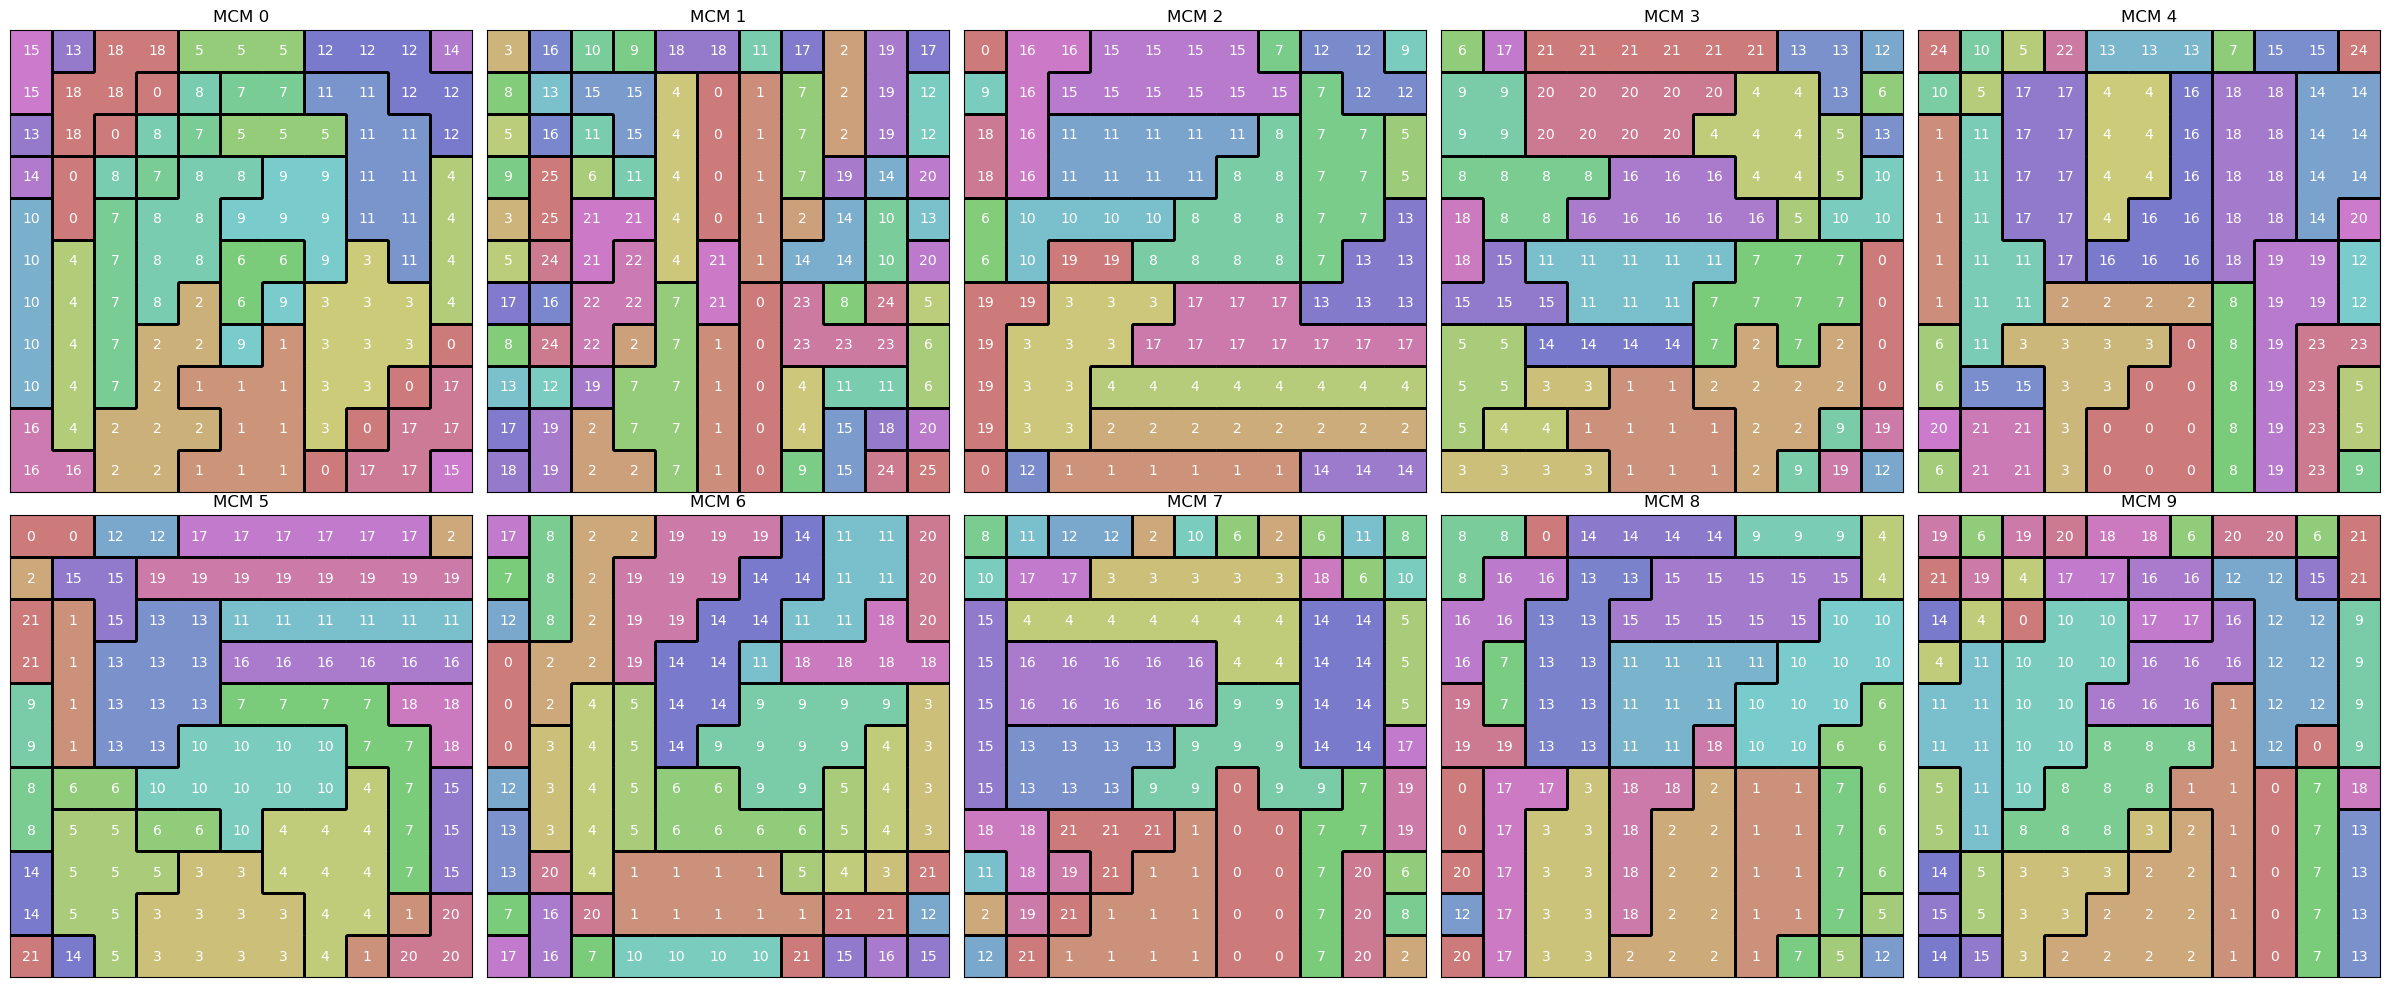

In [26]:
scale = 2
fig, axs  = plt.subplots(2,5,figsize=(12*scale,5*scale))
axs = axs.flatten()
for i, ax in enumerate(axs): 
    myplot.plot_communities(ax,myplot.generate_icc_comms_map(all_MCM[i]),f"MCM {i}")
# myplot.plot_communities(axs[1],mcm5_comms_map,"MCM 5")

plt.tight_layout()
plt.savefig("../figures/paper_comms.png",dpi=300, bbox_inches="tight")

In [26]:
# # difference 3 vs. 5
# dif_35 = all_P_icc_3[:,:,[3,5]].mean(axis=1)
# dif_35 = np.diff(dif_35, axis=1).flatten()

# # difference in means class 3 vs. rest
# dif_3r = all_P_icc_3.mean(axis=1)
# dif_3r = dif_3r[:,3] - dif_3r.mean(axis=1)

In [27]:
# bias = (dif_35[comms]*100).astype(int) 
# absmax = np.abs(bias.flat[np.abs(bias).argmax()]) # scale axis
# # diff_map is difference in average probabilities of an ICC over all images of class 3 vs class 5
# # FIXME problem is that borders are not enough to indicate which cells are the same ICC because they must not be adjacent

# plt.figure()
# # plt.title("Bias of ICC probabilities in MCM 3 for class 3 vs. class 5.") # plt.title(" Higher values = higher avg P for an image of class 3.")
# plt.title("3 vs.5: Indicative ICCs in MCM 3")
# r = (np.mean(bias)+np.std(bias))
# drawing_cond = lambda x: np.abs(x) > r
# myplot.partition_map(plt.gca(),bias,bias,borders,drawing_cond=drawing_cond)
# plt.show()


 Notes on possible indicativity meaures
 - in the supreme court paper by Lee, they calculate the infuence of a supereme justice by calculating e.g., mutual inforamtion(this justice, vs court)
    Option 1: MI
    - MI(own vote, majority vote)
    - for us this would be pixel vote vs. average vote of MCM
        - would need threshold for probability maybe (.5 == majority vote equivalent)
    Option 2: Suseptability Gamma (defined in text)
    

    


- 121 x 121 matrix of membership of which pixels are part of which icc could be useful but only in the new basis, right now the communities are perfectly separated

In [28]:
# comms, 11x11 matrix of integer community labels
# all_P_icc_3, [iccs, images, category] = [x,5k,10] where the iccs are part of 1 MCM 


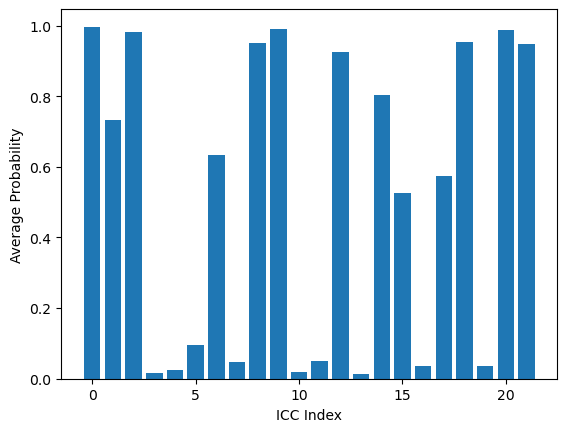

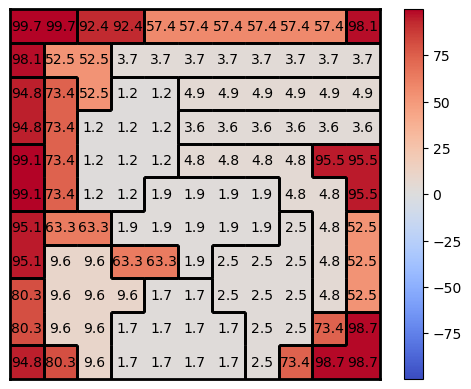

In [97]:
mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[5])
borders = myplot.find_borders(mcm3_comms_map)


distr = all_P_icc_5[:,:,3] # for MCM 0
out = np.sum(distr, axis=1)/distr.shape[1]

plt.figure()
plt.bar(range(len(out)), out)
plt.xlabel('ICC Index')
plt.ylabel('Average Probability')
# plt.title('Counts of ICCs')
plt.show()

mi_matrix = (out[mcm3_comms_map]*100).round(1)

plt.figure()
myplot.partition_map(plt.gca(),mi_matrix,mi_matrix,borders)    
plt.show()


### ICC single vote against Average Vote mutual information plots.
- A "vote" is 1 if P(icc_i| this_image) >= 0.5, else 0.
- Votes are not adjusted for the number of pixels an icc spans

comparing MCMs 3 and 5 for seeing a 3 or a 5

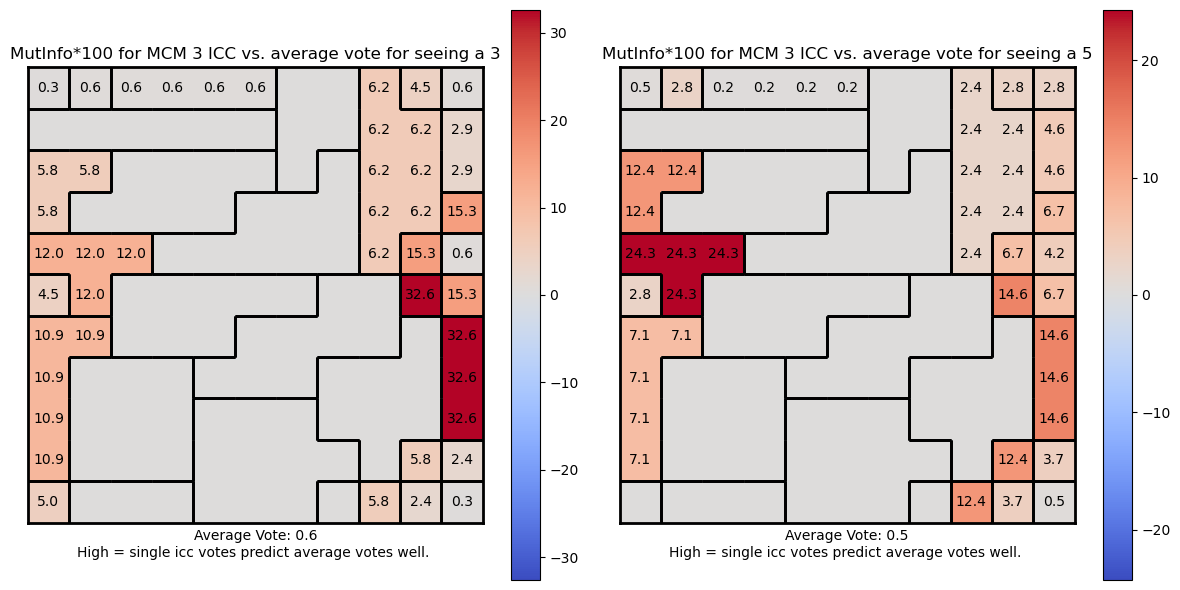

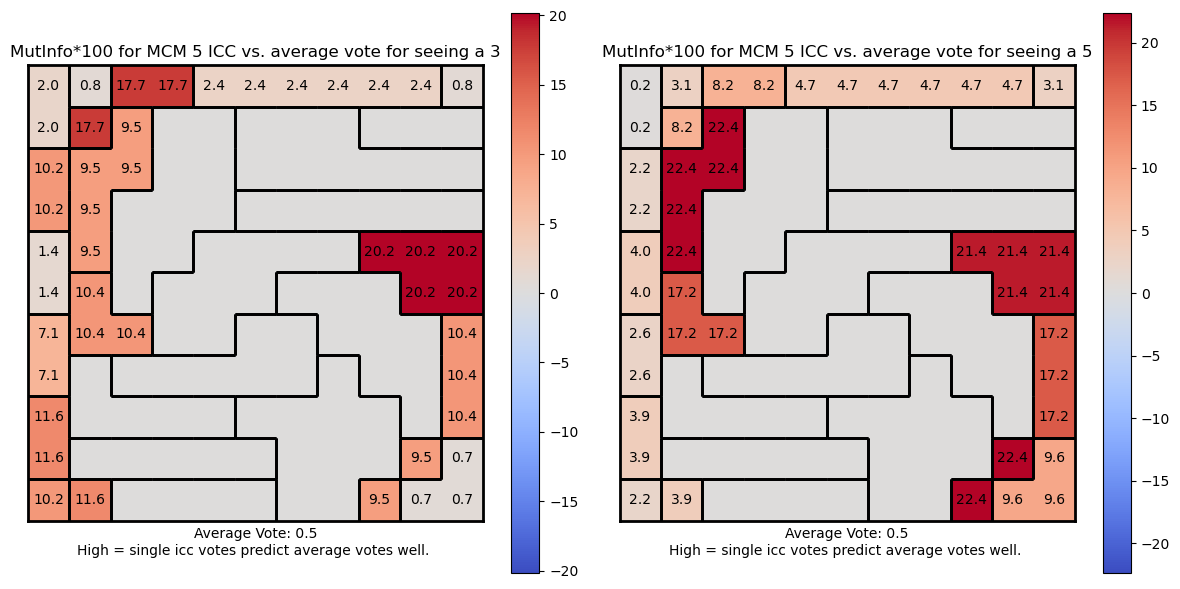

In [29]:
#  mutual information between MI(icc_vote, average_vote)
# NOTE: final MCM probability is product not sum so maybe average vote is not fair
# given a 3, calculate the MI(icc_vote, vs average vote)



selected = [3, 5]
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_3,mcm3_comms_map,3)
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_5,mcm5_comms_map,5)

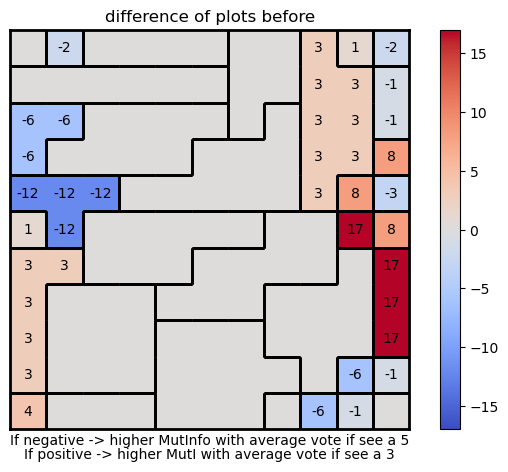

In [30]:
#  mutual information between MI(icc_vote, average_vote)
# NOTE: final MCM probability is product not sum so maybe average vote is not fair
# given a 3, calculate the MI(icc_vote, vs average vote)
from sklearn.metrics import normalized_mutual_info_score

selected = [3, 5]
nr_comms = np.max(mcm3_comms_map)+1

plt.figure()
# plt.title("Difference in MI class3 -class5 for icc in MCM3 vs. average")
plt.title("difference of plots before") 
P_m3_c3 = all_P_icc_3[:,:,3]
P_m3_c5 = all_P_icc_3[:,:,5]
# Average vs. Individual predicted label
out1 = np.zeros(nr_comms)
out2 = np.zeros(nr_comms)
for i in range(nr_comms):
    out1[i]=normalized_mutual_info_score(np.where(P_m3_c3.mean(axis=0)>=0.5,1,0),np.where(P_m3_c3[i,:]>=0.5,1,0))
    out2[i]=normalized_mutual_info_score(np.where(P_m3_c5.mean(axis=0)>=0.5,1,0),np.where(P_m3_c5[i,:]>=0.5,1,0))

# mi_matrix = (out1[comms]*100).round(1)
mi_matrix = ((out1[mcm3_comms_map] -out2[mcm3_comms_map])*100).astype(int)
plt.text(5,11, f"If negative -> higher MutInfo with average vote if see a 5", ha="center", va="bottom") # note vote not adjusted for number of pixels
plt.text(5,11+0.4, f"If positive -> higher MutI with average vote if see a 3", ha="center", va="bottom") # note vote not adjusted for number of pixels

myplot.partition_map(plt.gca(),mi_matrix,mi_matrix,myplot.find_borders(mcm3_comms_map),drawing_cond=lambda x: x!=0)                        
plt.tight_layout()
plt.show()


 0 vs. 1 are very easy to classify

In [31]:
# for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_P_icc_0 = myplot.calculate_P_icc(P, all_MCM,0,n_variables, data_path,data_filename_format)
all_P_icc_1 = myplot.calculate_P_icc(P, all_MCM,1,n_variables, data_path,data_filename_format)


In [ ]:

mcm0_comms_map = myplot.generate_icc_comms_map(all_MCM[0])
mcm1_comms_map = myplot.generate_icc_comms_map(all_MCM[1])

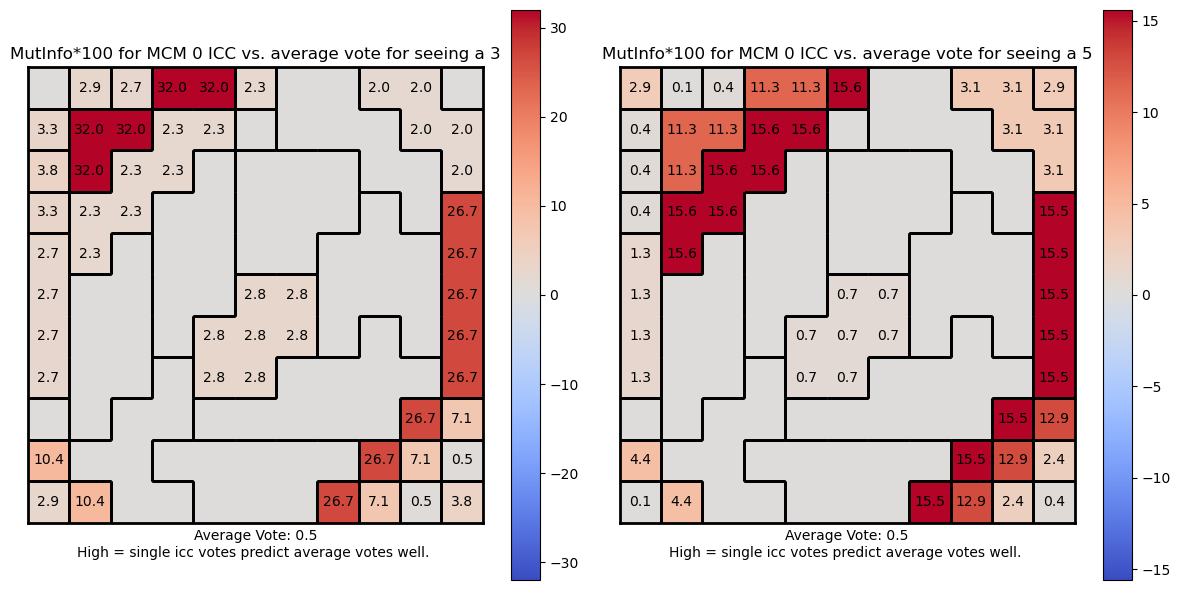

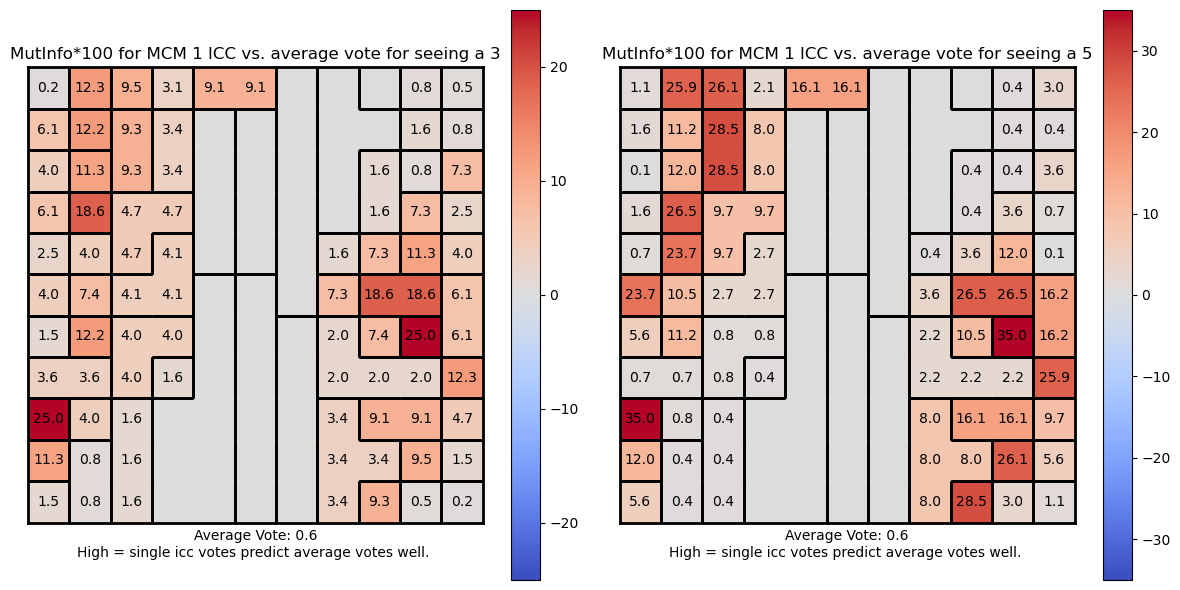

In [ ]:
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_0, mcm0_comms_map,0)
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_1, mcm1_comms_map,1)

In [ ]:
# need a co-occurance matrix of what it was called
# 121 by 121 of how destinctive that pixel is between 3 vs. 5

# 1 matrix = 1 image
# what icc these pixels are part of
